In [2]:
#The libraries used; pandas, numpy, matplotlib, sckit_learn, xgboost and Imlearn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from tqdm.notebook import tqdm
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing dataset
df = pd.read_csv('parkinson_disease.csv')

In [5]:
pd.set_option('display.max_columns', 10)
df.head(5)

,id,gender,PPE,DFA,RPDE,...,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,...,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,...,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,...,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,...,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,...,11.6891,8.2103,5.0559,6.1164,1


In [6]:
df.shape

(756, 755)

In [7]:
#Data exploration and cleaning
# The output is the information regarding data in the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [8]:
#Descriptive statistical measures of the dataset.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,125.500000,72.793721,0.000000,62.750000,125.500000,188.250000,251.00000
gender,756.0,0.515873,0.500079,0.000000,0.000000,1.000000,1.000000,1.00000
PPE,756.0,0.746284,0.169294,0.041551,0.762833,0.809655,0.834315,0.90766
DFA,756.0,0.700414,0.069718,0.543500,0.647053,0.700525,0.754985,0.85264
RPDE,756.0,0.489058,0.137442,0.154300,0.386537,0.484355,0.586515,0.87123
...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_33,756.0,12.375335,16.341665,1.628700,3.114375,4.741450,12.201325,73.53220
tqwt_kurtosisValue_dec_34,756.0,14.799230,15.722502,1.861700,3.665925,6.725700,21.922050,62.00730
tqwt_kurtosisValue_dec_35,756.0,14.751559,14.432979,1.955900,3.741275,7.334250,22.495175,57.54430
tqwt_kurtosisValue_dec_36,756.0,31.481110,34.230991,2.364000,3.948750,10.637250,61.125325,156.42370


In [9]:
#The output shows that our the dataset has no missing values and how its distributed in the columnns.

df.isnull().sum().sum()

np.int64(0)

In [10]:
df = df.groupby('id').mean().reset_index()
df.drop('id', axis=1, inplace=True)

In [11]:
columns = list(df.columns)
for col in columns:
	if col == 'class':
		continue

	filtered_columns = [col]
	for col1 in df.columns:
		if((col == col1) | (col == 'class')):
			continue

		val = df[col].corr(df[col1])

		if val > 0.7:
			# If the correlation between the two
			# features is more than 0.7 remove
			columns.remove(col1)
			continue
		else:
			filtered_columns.append(col1)

	# After each iteration filter out the columns
	df = df[filtered_columns]
df.shapecolumns = list(df.columns)
for col in columns:
	if col == 'class':
		continue

	filtered_columns = [col]
	for col1 in df.columns:
		if((col == col1) | (col == 'class')):
			continue

		val = df[col].corr(df[col1])

		if val > 0.7:
			# If the correlation between the two
			# features is more than 0.7 remove
			columns.remove(col1)
			continue
		else:
			filtered_columns.append(col1)

	# After each iteration filter out the columns
	df = df[filtered_columns]
df.shape

(252, 287)

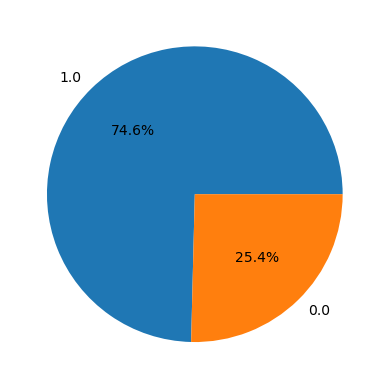

In [12]:
x = df['class'].value_counts()
plt.pie(x.values,
		labels = x.index,
		autopct='%1.1f%%')
plt.show()

In [13]:
features = df.drop('class', axis=1)
target = df['class']


X_train, X_val, y_train, y_val = train_test_split(features, target,
                                                  test_size=0.2,
                                                  random_state=10)

ros = RandomOverSampler(sampling_strategy=1.0, random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_resampled.shape, y_resampled.value_counts()

((302, 286),
 class
 1.0    151
 0.0    151
 Name: count, dtype: int64)

In [14]:
from sklearn.metrics import roc_auc_score as ras

# Models list
models = [LogisticRegression(class_weight='balanced'), XGBClassifier(), SVC(kernel='rbf', probability=True)]

# Model training and evaluation
for model in models:
    model.fit(X_resampled, y_resampled)

    print(f'{model} : ')

    train_preds = model.predict(X_resampled)
    print('Training Accuracy : ', ras(y_resampled, train_preds))

    val_preds = model.predict(X_val)
    print('Validation Accuracy : ', ras(y_val, val_preds))
    print()


LogisticRegression(class_weight='balanced') : 
Training Accuracy :  0.7185430463576159
Validation Accuracy :  0.61003861003861

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.7944015444015444

SVC(probability=True) : 
Training Accura

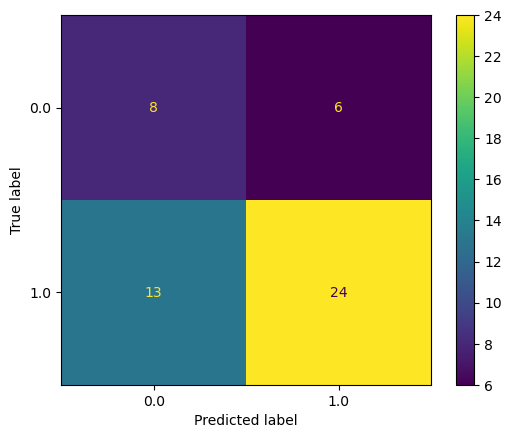

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(models[0], X_val, y_val)
plt.show()